In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns

In [73]:
DF= pd.read_csv("../Data_v4_AllNaNsReplaced_dummies.csv")
DF.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,HouseStyle,OverallQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,2,0,4,4,2.0,7,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,2,0,4,4,1.0,6,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,2,0,3,4,2.0,7,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,2,0,3,4,2.0,7,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,2,0,3,4,2.0,8,...,0,0,0,1,0,0,0,0,1,0


In [74]:
DF.shape

(1460, 211)

In [75]:
# Importing the dataset
dataset = DF.copy()

# X is the predictor variable
X = DF.iloc[:, 0:80].values

# y is the response variable
y = DF.SalePrice.values


In [76]:
# Splitting data 
# Splingintg original datsa in to test (20% of data) and train(80% of data)
from sklearn.cross_validation import train_test_split
x_train, true_x_test, y_train, true_y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [77]:
# # Splitting train into modeling_test (25% of D2) and modeling_train (75% of D2) 
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)

In [78]:
print(x_train.shape)
print(x_test.shape)
print(true_x_test.shape)


(876, 80)
(292, 80)
(292, 80)


## Julia's LightGBM procedure

In [79]:
import lightgbm as lgb

d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mse'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [80]:
#Prediction
y_pred=clf.predict(x_test)
y_pred

array([172585.53602497, 160943.34093912, 176853.31283273, 191335.12242037,
       190695.37458332, 172667.98219421, 173279.32866806, 202771.31600333,
       190882.06805137, 176673.13243801, 195596.86398732, 193648.50228019,
       160876.08505791, 185921.6068748 , 199952.01443162, 180041.89968566,
       158780.27055394, 173398.23818189, 159132.9461808 , 160291.01432282,
       169184.67998291, 181104.31138372, 181521.01689645, 177641.55645253,
       158394.95676112, 178386.67809192, 172606.26407824, 187929.54871604,
       188071.140231  , 183292.87295365, 175571.26794317, 179257.69101669,
       176642.06133464, 171694.66552641, 176268.50705693, 172663.73911481,
       177999.56704302, 179675.26981884, 174905.5416173 , 175340.82713314,
       176019.32906576, 171321.36388481, 169751.38146902, 196053.22433663,
       215513.08415107, 187728.98277731, 176924.24344816, 190617.69203047,
       171301.28455002, 186359.84110749, 169758.23294473, 167997.45442234,
       176859.17602412, 2

In [81]:
mse = np.mean((y_test-y_pred)**2)
mse

4179519051.5019965

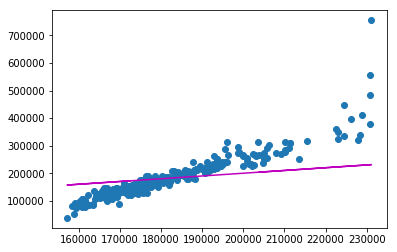

In [82]:
plt.scatter(y_pred,y_test)
plt.plot(y_pred,y_pred,"m")
plt.show()

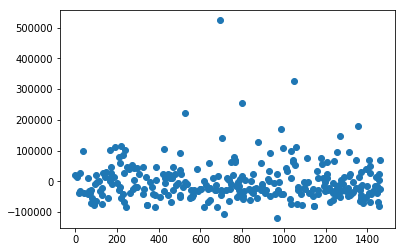

In [83]:
plt.scatter(x_test[:,0],y_test-y_pred)
plt.show()

In [84]:
MSEs = {}
Mse_last = mse
for lr in np.linspace(0.01,1,100):
    params['learning_rate'] = lr
    clf = lgb.train(params, d_train, 100)
    y_pred=clf.predict(x_test)
    Mse = np.mean((y_pred-y_test)**2)
    if Mse > Mse_last:
        break
    MSEs.update({"learning_rate = " + str(round(lr,3)) : Mse})
    Mse_last = Mse

In [85]:
MSEs

{'learning_rate = 0.01': 1889233600.851637,
 'learning_rate = 0.02': 1003702688.1057637,
 'learning_rate = 0.03': 790320930.5781779,
 'learning_rate = 0.04': 715325108.123973,
 'learning_rate = 0.05': 676212482.6802417,
 'learning_rate = 0.06': 651365118.6561786,
 'learning_rate = 0.07': 628798774.5411288,
 'learning_rate = 0.08': 608765717.9987497,
 'learning_rate = 0.09': 595846103.0209448,
 'learning_rate = 0.1': 584298600.5865711,
 'learning_rate = 0.11': 572941689.3560338,
 'learning_rate = 0.12': 563846831.4176245,
 'learning_rate = 0.13': 537393615.0991888}

In [86]:
MSEs = {}
Mse_last = mse
for lr in np.linspace(0.12,0.14,21):
    params['learning_rate'] = lr
    clf = lgb.train(params, d_train, 100)
    y_pred=clf.predict(x_test)
    Mse = np.mean((y_pred-y_test)**2)
    if Mse > Mse_last:
        break
    MSEs.update({"learning_rate = " + str(round(lr,3)) : Mse})
    Mse_last = Mse

In [87]:
MSEs

{'learning_rate = 0.12': 563846831.4176245,
 'learning_rate = 0.121': 558361811.7012626}

In [88]:
params['learning_rate'] = 0.121
clf = lgb.train(params, d_train, 100)
y_pred=clf.predict(x_test)
Mse = np.mean((y_pred-y_test)**2)

In [89]:
(mse-Mse)/Mse  # new LR is 6.4x better than the original

6.485323967209532

## End of Julia's LightGBM

## Apply the models (parameters settings) to the true testing data set

In [94]:
import lightgbm as lgb

d_train = lgb.Dataset(true_x_test, label= true_y_test)
params = {}
params['learning_rate'] = 0.121
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mse'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [95]:
y_pred=clf.predict(true_x_test)
y_pred

array([228146.62231058, 135434.957195  , 103809.01839637, 191552.28217254,
       104736.17907603,  97596.93539941, 318646.41266187, 140628.75377777,
       403286.550824  , 147886.1396295 , 181710.5445598 , 123395.61526192,
       227316.46130488, 118571.14730433, 107269.81771623, 143122.28176257,
       188055.03750868, 121983.16221206, 143378.90708789, 146472.76209813,
       161874.32917905, 162244.2111023 ,  98403.50762059, 182906.85409973,
       170689.54847109, 183745.00220406, 171570.72211957,  90440.93513187,
       353465.85234446, 112157.44272967, 112403.9706875 , 197020.61094312,
       152944.75384323, 312812.0031497 , 341146.41866573, 193016.79252045,
       315932.64684798, 109923.73192526, 269799.50836444, 336228.27738941,
       253120.7445965 , 125998.98987504, 176597.16432137, 306509.1097441 ,
       354515.50893036, 115011.22904923, 124045.4437826 , 120962.98643181,
       156872.40675508,  92797.73491379, 391579.2807881 , 151453.80201891,
       153770.82251363,  

In [96]:
mse = np.mean((true_y_test-y_pred)**2)
mse

865343190.1883539

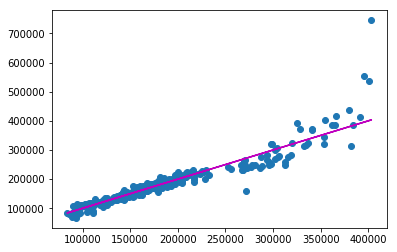

In [99]:
plt.scatter(y_pred,true_y_test)
plt.plot(y_pred,y_pred,"m")
plt.show()

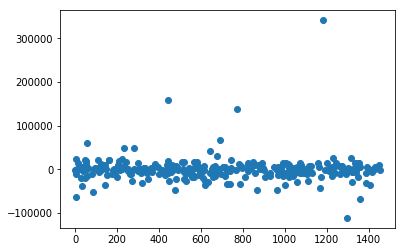

In [100]:
plt.scatter(true_x_test[:,0],true_y_test-y_pred)
plt.show()